## 划分训练集和验证集
## 按照 MMPreTrain CustomDataset 格式组织训练集和验证集

In [ ]:
!mkdir data && cd data && mkdir fruit_dataset/train
!tar -xvf fruit30_train.tar -C ./fruit_dataset/train


In [ ]:
# https://blog.51cto.com/u_15088375/3248040
!cd fruit_dataset
!python split_dataset.py 

## 使用 MMPreTrain 算法库，编写配置文件，正确加载预训练模型
## 在水果数据集上进行微调训练

In [ ]:
!mim train mmpretrain resnet18_8xb32_fruit_finetune.py --work=./exp_fruit

## 使用 MMPreTrain 的 ImageClassificationInferencer 接口，对网络水果图像，或自己拍摄的水果图像，使用训练好的模型进行分类

In [1]:
from mmpretrain import ImageClassificationInferencer
inference = ImageClassificationInferencer('./resnet18_8xb32_fruit_finetune.py', pretrained='exp_fruit/best_accuracy_top1_epoch_11.pth')
inference('apple.jpg')

/home/dongkaixing/anaconda3/envs/openmmlab_camb_test/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loads checkpoint by local backend from path: exp_fruit/best_accuracy_top1_epoch_11.pth


[{'pred_scores': array([9.1691997e-13, 1.3627839e-07, 1.6769444e-08, 1.0643795e-10,
         1.0755035e-10, 3.3954103e-13, 5.0790936e-09, 1.2376145e-03,
         3.7516519e-09, 2.5768439e-12, 7.4498314e-09, 2.0746192e-07,
         6.0325116e-03, 5.5324581e-06, 3.2804790e-09, 2.2308035e-07,
         8.8712468e-08, 1.0040041e-11, 9.1505265e-01, 7.7419586e-02,
         1.8123799e-11, 4.5530091e-09, 6.1750605e-11, 6.6448643e-12,
         2.0801872e-08, 4.3561257e-10, 2.5063462e-04, 6.8234596e-07,
         1.2366260e-12, 2.1357816e-12], dtype=float32),
  'pred_label': 18,
  'pred_score': 0.9150526523590088,
  'pred_class': '苹果-红'}]

## 需提交的验证集评估指标（不能低于 60%）
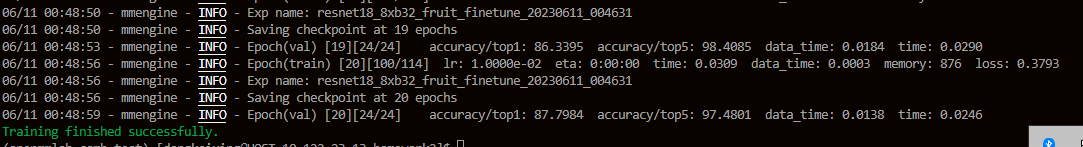
